In [122]:
from lorenzetti_utils.read_events import *
from Gaugi import stdvector2list, progressbar, GeV
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from ROOT import kBird,kBlackBody,gStyle
from pprint import pprint

import pandas as pd
import array
import numpy as np
import pickle
import rootplotlib as rpl
rpl.set_lorenzetti_style()
rpl.suppress_root_warnings()

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def read_events( path , nov=-1):
    
    event = EventStore(path, "physics")
    vars = ['e','et','eta','phi','reta','rphi','rhad','eratio','weta2','f1','f3']
    d = { key:[] for key in vars }
    d['rings'] = []
    if nov < 0 or nov > event.GetEntries():
        nov = event.GetEntries()
    
    for entry in progressbar( range(nov) , 'Reading...') : 
        event.GetEntry(entry)
        cluster_cont = event.retrieve("CaloClusterContainer_Clusters")
        rings_cont = event.retrieve("CaloRingsContainer_Rings")
        for caloRings in event.retrieve("CaloRingsContainer_Rings"):
            emClus = cluster_cont.at(caloRings.cluster_link)
            for key in vars:
                d[key].append( getattr(emClus,key) )    
            d['rings'].append(stdvector2list(caloRings.rings))
            
    return pd.DataFrame(d)

## Read Events:

In [3]:
basepath = '/home/jodafons/public/cern_data/simulation/MonteCarlo_Simulation_Zee_and_JF17_plus_MinBias_Avgmu_60_WithMagneticField'

In [4]:
path = basepath+'/Zee/AOD/Zee.AOD.root'
zee = read_events(path)

Reading...: 100%|██████████| 10000/10000 [00:19<00:00, 515.52it/s]


In [5]:
path = basepath+'/JF17/AOD/JF17.AOD.root'
jets = read_events(path)

Reading...: 100%|██████████| 9986/9986 [00:27<00:00, 367.71it/s]


In [6]:
path = basepath+'/Zee_mb/AOD/Zee_mb.AOD.root'
zee_mb = read_events(path)

Reading...: 100%|██████████| 10000/10000 [00:30<00:00, 322.64it/s]


In [7]:
path = basepath+'/JF17_mb/AOD/JF17_mb.AOD.root'
jets_mb = read_events(path)

Reading...: 100%|██████████| 9986/9986 [00:42<00:00, 233.29it/s]


## Shower Shapes:

In [8]:
def make_1d_histograms(sgn, bkg, bins, xmin, xmax):
    
    h_zee = rpl.hist1d.new( 'zee', bins, xmin ,xmax )
    rpl.hist1d.fill( h_zee, sgn )
    d_zee = rpl.hist1d.density( h_zee )
    d_zee.SetLineColor(kAzure)
    d_zee.SetFillColor(kAzure-4)
    h_jets = rpl.hist1d.new( 'jets', bins, xmin ,xmax )
    rpl.hist1d.fill( h_jets, bkg )
    d_jets = rpl.hist1d.density( h_jets )
    d_jets.SetLineColor(kRed)
    d_jets.SetFillColor(rpl.get_color(kRed, 0.5))
    return d_zee, d_jets

def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=16, option = 'f' )
   

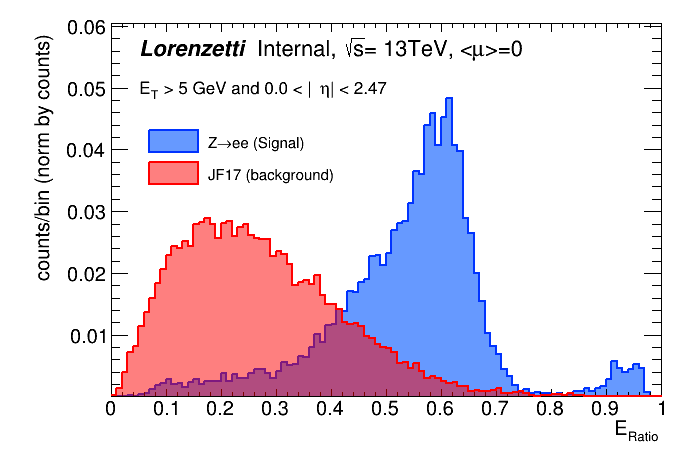

In [57]:
sgn = zee.loc[ (zee['et'] > 5*GeV) & (abs(zee['eta']) <= 2.47) ]['eratio'].values
bkg = jets.loc[ (jets['et'] > 5*GeV) & (abs(jets['eta']) <= 2.47) ]['eratio'].values
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0, 1)
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('E_{Ratio}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
add_legend( 0.2,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.25) 
fig.show()
fig.savefig('lorenzetti_simulation_Zee_vs_jets_et.pdf')

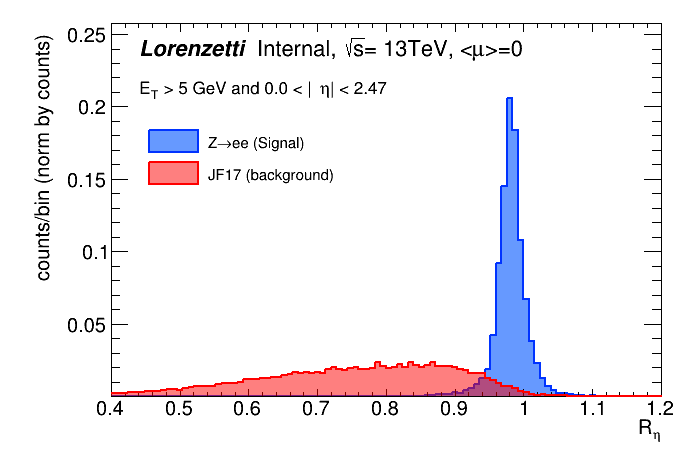

In [58]:
sgn = zee.loc[ (zee['et'] > 5*GeV) & (abs(zee['eta']) <= 2.47) ]['reta'].values
bkg = jets.loc[ (jets['et'] > 5*GeV) & (abs(jets['eta']) <= 2.47) ]['reta'].values
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0.4, 1.2)
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('R_{#eta}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
add_legend( 0.2,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.25) 
fig.show()
fig.savefig('lorenzetti_simulation_Zee_vs_jets_reta.pdf')

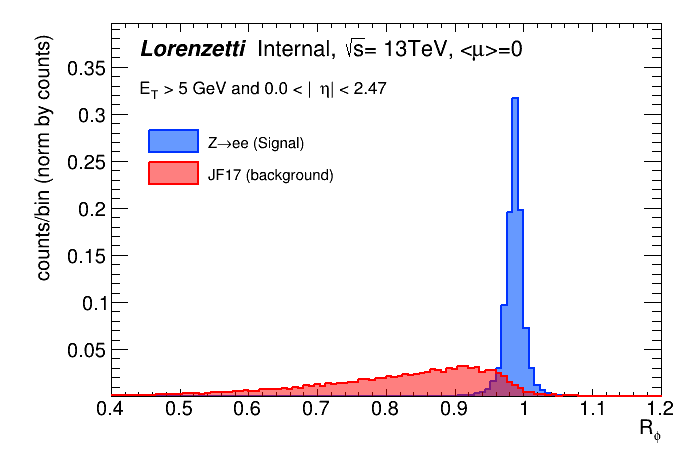

In [59]:
sgn = zee.loc[ (zee['et'] > 5*GeV) & (abs(zee['eta']) <= 2.47) ]['rphi'].values
bkg = jets.loc[ (jets['et'] > 5*GeV) & (abs(jets['eta']) <= 2.47) ]['rphi'].values
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0.4, 1.2)
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('R_{#phi}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
add_legend( 0.2,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.25) 
fig.show()
fig.savefig('lorenzetti_simulation_Zee_vs_jets_rphi.pdf')

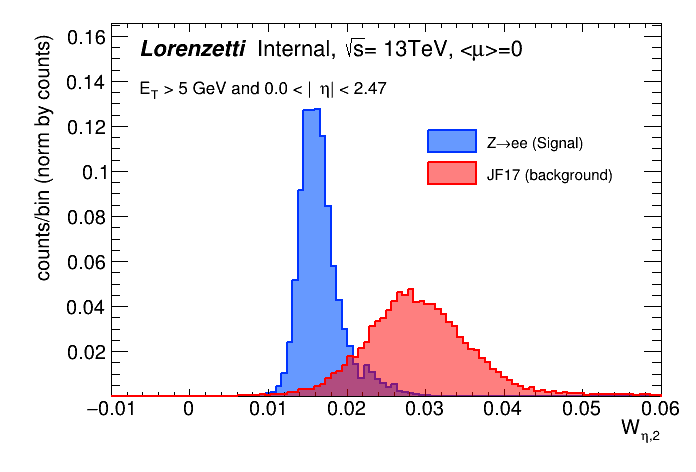

In [60]:
sgn = zee.loc[ (zee['et'] > 5*GeV) & (abs(zee['eta']) <= 2.47) ]['weta2'].values
bkg = jets.loc[ (jets['et'] > 5*GeV) & (abs(jets['eta']) <= 2.47) ]['weta2'].values
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, -0.01, 0.06)
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('W_{#eta,2}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_lorenzetti_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, <#mu>=0')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
add_legend( 0.6,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
fig.savefig('lorenzetti_simulation_Zee_vs_jets_weta2.pdf')

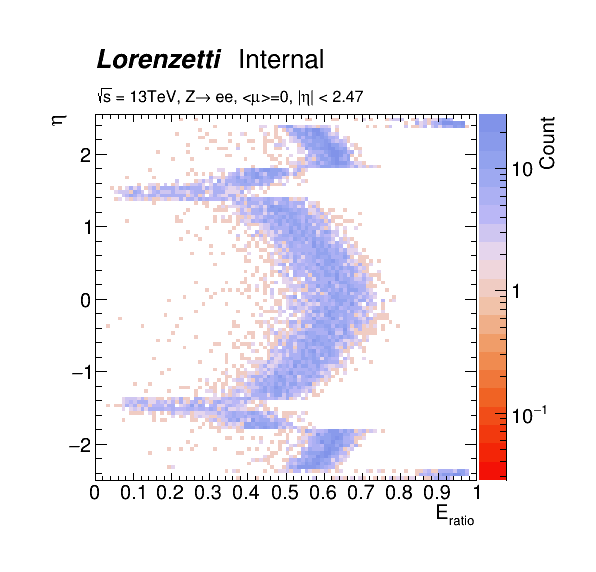

In [61]:
sgn_eta = zee.loc[ (zee['et'] > 5*GeV) & (abs(zee['eta']) <= 2.47) ]['eta'].values
sgn_eratio = zee.loc[ (zee['et'] > 5*GeV) & (abs(zee['eta']) <= 2.47) ]['eratio'].values
fig = rpl.create_canvas('my_canvas','',600, 600)
canvas = fig.get_pad()
canvas.SetRightMargin(0.2)
canvas.SetTopMargin(0.2)
canvas.SetLogz()
gStyle.SetPalette(kBlackBody)
h1 = rpl.hist2d.new( 'zee', 100, 0, 1, 100, -2.5, 2.5)
rpl.hist2d.fill( h1, sgn_eratio, sgn_eta )
rpl.add_hist( h1, 'colz')
rpl.set_lorenzetti_label(0.16,0.88,'Internal')
rpl.add_text(0.16, 0.82, '#sqrt{s} = 13TeV, Z#rightarrow ee, <#mu>=0, |#eta| < 2.47', textsize=0.03)
rpl.set_xlabel('E_{ratio}')
rpl.set_ylabel('#eta')
h1.GetZaxis().SetTitle("Count")
#legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
#add_legend( 0.6,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes(YTitleOffset=1, ZTitleOffset=1.1) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
fig.savefig('output/lorenzetti_simulation_Zee_eratio_vs_eta.pdf')

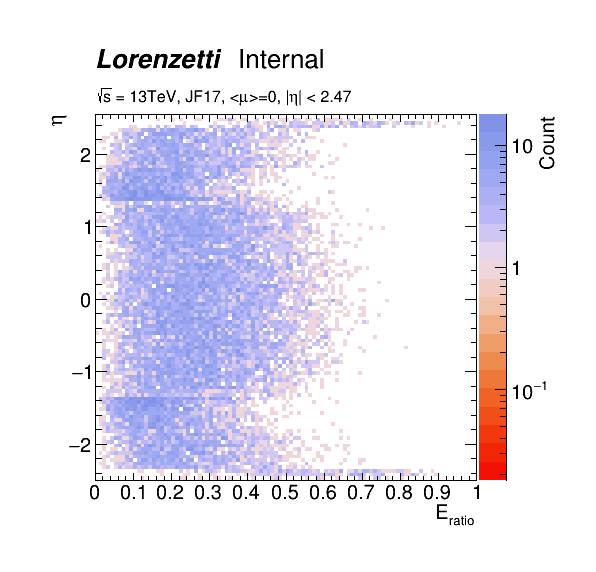

In [63]:
bkg_eta = jets.loc[ (jets['et'] > 5*GeV) & (abs(jets['eta']) <= 2.47) ]['eta'].values
bkg_eratio = jets.loc[ (jets['et'] > 5*GeV) & (abs(jets['eta']) <= 2.47) ]['eratio'].values
fig = rpl.create_canvas('my_canvas','',600, 600)
canvas = fig.get_pad()
canvas.SetRightMargin(0.2)
canvas.SetTopMargin(0.2)
canvas.SetLogz()
gStyle.SetPalette(kBlackBody)
h1 = rpl.hist2d.new( 'zee', 100, 0, 1, 100, -2.5, 2.5)
rpl.hist2d.fill( h1, bkg_eratio, bkg_eta )
rpl.add_hist( h1, 'colz')
rpl.set_lorenzetti_label(0.16,0.88,'Internal')
rpl.add_text(0.16, 0.82, '#sqrt{s} = 13TeV, JF17, <#mu>=0, |#eta| < 2.47', textsize=0.03)
rpl.set_xlabel('E_{ratio}')
rpl.set_ylabel('#eta')
h1.GetZaxis().SetTitle("Count")
#legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
#add_legend( 0.6,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes(YTitleOffset=1, ZTitleOffset=1.1) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
fig.savefig('output/lorenzetti_simulation_jets_eratio_vs_eta.pdf')

## Cells:

In [123]:
with open('/home/jodafons/grid.pkl', 'rb') as handle:
    grid = pickle.load(handle)

In [247]:
def get_cells (path, evt, samplings ):
    event = EventStore(path, "physics")
    event.GetEntry(evt)
    cluster = event.retrieve("CaloClusterContainer_Clusters").at(0)
    cells = event.retrieve("CaloCellContainer_Cells")
    descriptors = event.retrieve("CaloDetDescriptorContainer_Cells" )
    cluster_cells = []
    for link in cluster.cell_links:
        cluster_cells.append( cells.at(link) )
    collections = []
    class Cell:
        def __init__( self, e, et, eta, phi, sampling ):
            self.e = float(e); self.et = float(et); 
            self.eta = float(eta); self.phi = float(phi); self.sampling = int(sampling)
    for cell in cluster_cells:
        det = descriptors.at( cell.descriptor_link )
        if det.sampling in samplings:
            collections.append(Cell(det.e, cell.et, cell.eta, cell.phi, det.sampling))
    return cluster.eta, cluster.phi, collections

def make_hist_cells( cells, cl_eta, cl_phi, eta_list, phi_list, eta_window, phi_window ):
    
    def phi_fix(phi):
        if phi < -1*np.pi : return phi + 2*np.pi
        if phi > np.pi: return phi - 2*np.pi
        return phi
    def diff( phi1, phi2 ):
        return phi_fix( phi_fix(phi1) - phi_fix(phi2) )
        
    eta_bins = []; phi_bins = []
    for eta in eta_list:
        deta = abs(eta - cl_eta)
        if deta < eta_window/2:
            eta_bins.append(eta)
    for phi in phi_list:
        dphi = abs(diff(phi, cl_phi))
        if dphi < phi_window/2:
            phi_bins.append(phi)
    eta_bins.sort()
    phi_bins.sort()
    hist = rpl.hist2d.new2( 'hist', eta_bins, phi_bins )
    
    for cell in cells:
        binx = hist.GetXaxis().FindBin(cell.eta)
        biny = hist.GetYaxis().FindBin(cell.phi)    
        hist.SetBinContent( binx, biny, cell.e )
    return hist

eta = 1.34, phi = 0.77
array('d', [1.15, 1.175, 1.2, 1.225, 1.25, 1.275, 1.3, 1.325, 1.35, 1.375, 1.4, 1.425, 1.45, 1.475, 1.5])
array('d', [0.58904862, 0.61359232, 0.63813601, 0.6626797, 0.68722339, 0.71176709, 0.73631078, 0.76085447, 0.78539816, 0.80994186, 0.83448555, 0.85902924, 0.88357293, 0.90811663, 0.93266032, 0.95720401])


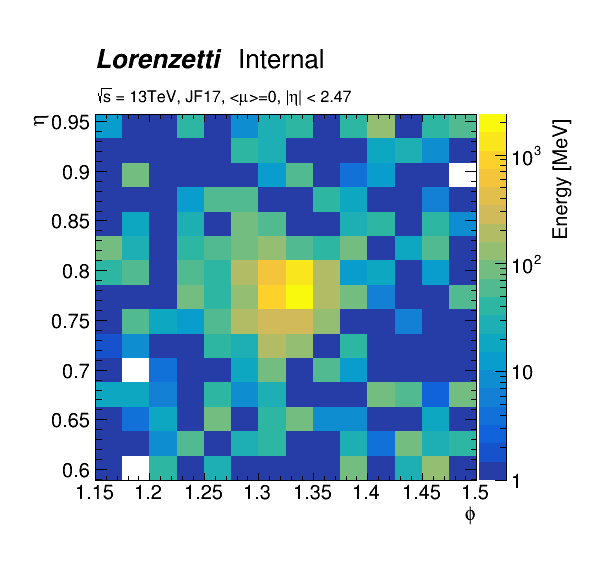

In [249]:
path = basepath+'/Zee/AOD/Zee.AOD.root'
eta, phi, cells = get_cells(path, 0, [3])
print('eta = %1.2f, phi = %1.2f' % (eta, phi) )
rpl.clear()
fig = rpl.create_canvas('my_canvas','',600, 600)
h1 = make_hist_cells( cells, eta, phi, grid['EMB2_0_etabins'], grid['EMB2_0_phibins'], 0.4, 0.4 )
canvas = fig.get_pad()
canvas.SetRightMargin(0.2)
canvas.SetTopMargin(0.2)
canvas.SetLogz()
gStyle.SetPalette(kBird)
rpl.add_hist( h1, 'colz')
rpl.set_lorenzetti_label(0.16,0.88,'Internal')
rpl.add_text(0.16, 0.82, '#sqrt{s} = 13TeV, JF17, <#mu>=0, |#eta| < 2.47', textsize=0.03)
rpl.set_xlabel('#phi')
rpl.set_ylabel('#eta')
h1.GetZaxis().SetTitle("Energy [MeV]")
#legends = ['Z#rightarrowee (Signal)', 'JF17 (background)']
#add_legend( 0.6,0.6, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
rpl.format_canvas_axes(YTitleOffset=1.5, ZTitleOffset=1.5) 
#rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
#fig.savefig('output/lorenzetti_simulation_jets_eratio_vs_eta.pdf')